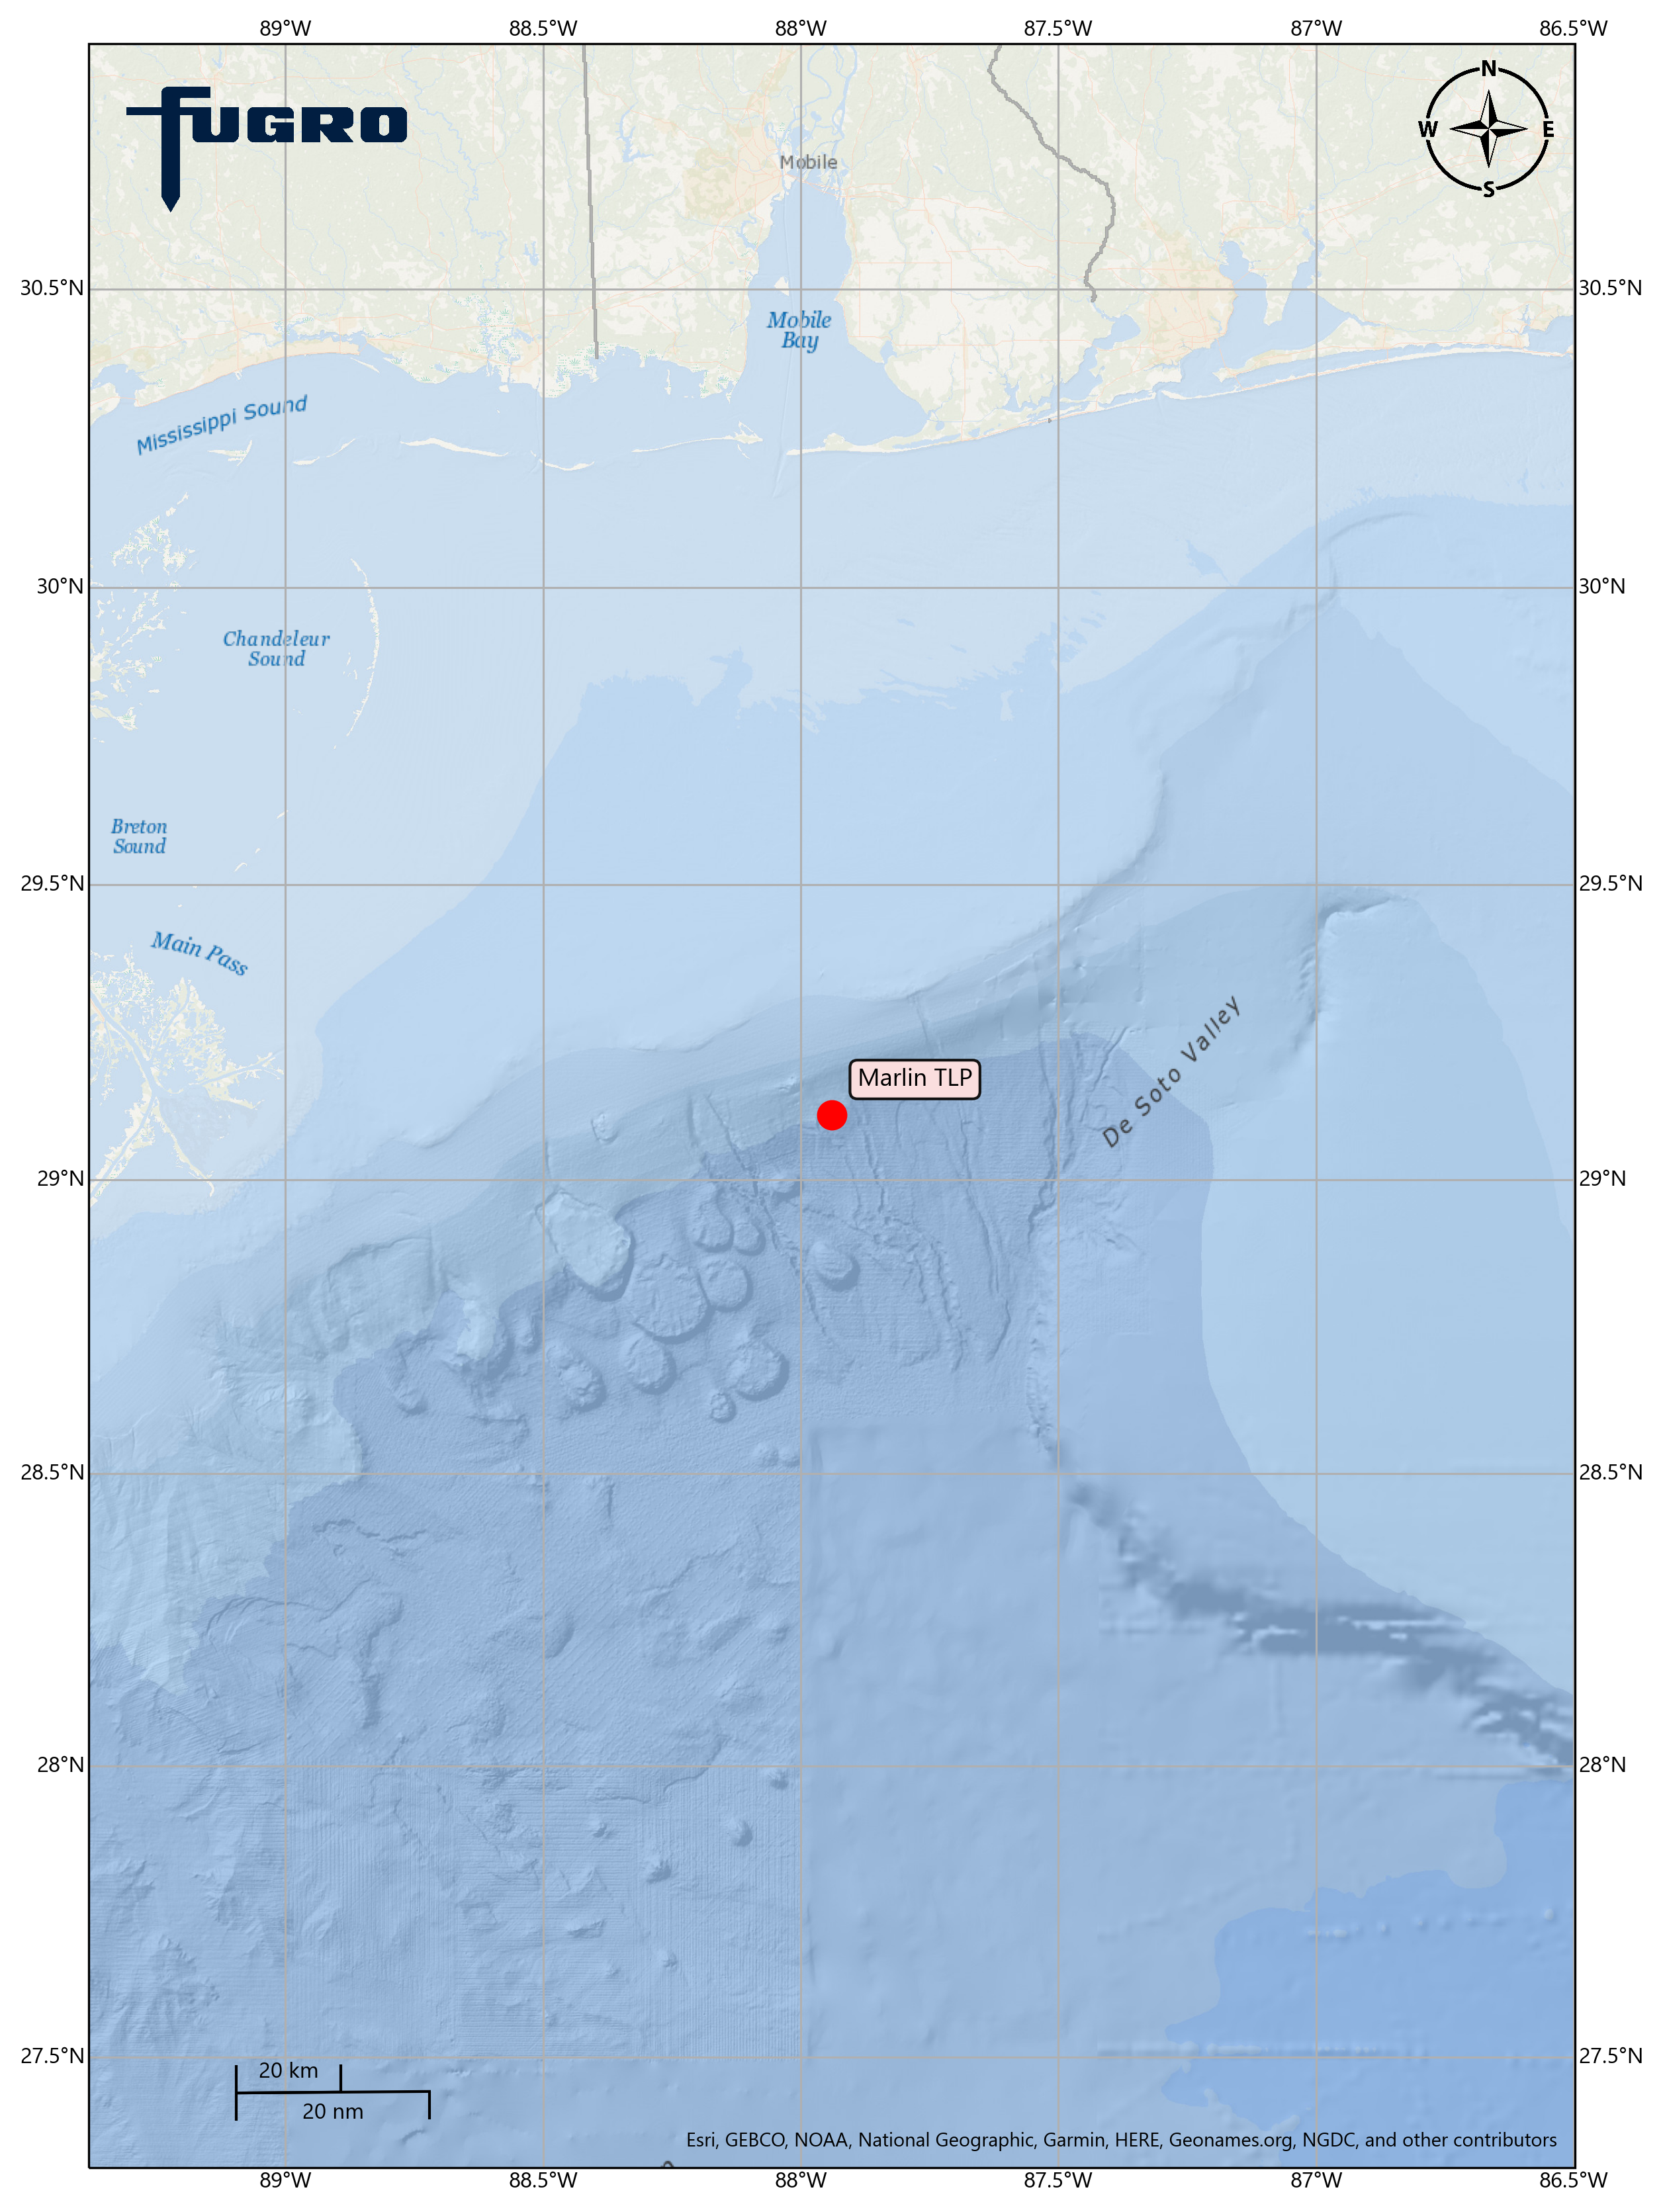

In [1]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, AnchoredText, OffsetImage
plt.rcParams['font.sans-serif'] = "Segoe ui"

#Location to plot in map 1- Longitude 2- Latitude 3- Name of location
point = -87.94, 29.11, 'Marlin TLP'
Map_c = -87.94, 29.11 #Central point in Map

SOURCE = 'Esri, GEBCO, NOAA, National Geographic, Garmin, HERE, Geonames.org, NGDC, and other contributors'
url = 'https://server.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Base/MapServer/tile/{z}/{y}/{x}'
url1 = 'https://server.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Reference/MapServer/tile/{z}/{y}/{x}'

image = cimgt.GoogleTiles(url=url)
image1 = cimgt.GoogleTiles(url=url1, desired_tile_form="RGBA")
p = image1.crs
projection = ccrs.PlateCarree()

xc, yc = p.transform_point(Map_c[0], Map_c[1], projection)
#Create an empty figure
fig, ax = plt.subplots(figsize=(8.5, 11), dpi=300, subplot_kw={"projection": p})
dx = 140 / (111.12 * np.cos(np.deg2rad(Map_c[1])))
ax.set_extent([Map_c[0] - dx, Map_c[0] + dx, Map_c[1] - 1.8, Map_c[1] + 1.8])
#Add Map
ax.add_image(image, 10)
ax.add_image(image1, 9)

#add Fugro Logo
im_box = OffsetImage(plt.imread('Logo wordmark_RGB_EN_QB.png'), zoom=.02)
ab = AnnotationBbox(im_box, (xc, yc), (0.12, .95), 'data', "axes fraction", False, 0.1)
ax.add_artist(ab)

#Add compass image
im_box = OffsetImage(plt.imread('compass2.png'), zoom=.05)
ab = AnnotationBbox(im_box, (xc, yc), (0.94, .96), 'data', "axes fraction", False, 0.1)
ax.add_artist(ab)

#Add map sources
text = AnchoredText(SOURCE, loc=4, prop={'size': 7}, frameon=False)
ax.add_artist(text)

#Plot point and name
plt.plot(point[0], point[1], transform=projection, marker='o', c='red', ms=10)
ax.text(point[0] + .05, point[1] + .05, point[2], transform=projection, c='k',
        size=9, bbox=dict(boxstyle="round", ec='#121212', fc='#fadede'))

#Add gridlines in map
gl=ax.gridlines(draw_labels=True, edgecolor='gray', linewidth=.75)
gl.xlabel_style = {'size': 8,}
gl.ylabel_style = {'size': 8,}

#Make tmc horizontally centred on the middle of the map,
tmc = ccrs.TransverseMercator(Map_c[0], Map_c[1], approx=True)
#Get the extent of the plotted area in coordinates in metres
x0, x1, y0, y1 = ax.get_extent(tmc)
#Turn the specified scalebar location into coordinates in metres
#Generate the x coordinate for the ends of the scalebar
sbx_le = x0 + (x1 - x0) * 0.1
sbx_mi = sbx_le + 20000 #scale bar x position 20 kilometer
sbx_ri = sbx_le + 37040 #scale bar x position 20 nautical miles
sby_top = y0 + (y1 - y0) * 0.04  #scale bar y position top
sby_mid = y0 + (y1 - y0) * 0.035 #scale bar y position center
sby_bot = y0 + (y1 - y0) * 0.02  #scale bar y position bottom

#Plot the scalebar
ax.plot([sbx_le, sbx_mi], [sby_mid, sby_mid], transform=tmc, c='k', lw=1, marker=2, ms=10)
ax.plot([sbx_le, sbx_ri], [sby_mid, sby_mid], transform=tmc, c='k', lw=1, marker=3, ms=10)
#Plot the scalebar label
ax.text((sbx_le + sbx_mi)/2, sby_top, '20 km', transform=tmc, c='k', size=8, ha='center', va='bottom')
ax.text((sbx_le + sbx_ri)/2, sby_bot, '20 nm', transform=tmc, c='k', size=8, ha='center', va='bottom')

plt.tight_layout()
fig.savefig('frontispiece_300dpi.png', dpi=300)
#fig.savefig('frontispiece_600dpi.png', dpi=600)
plt.show()